# CPSC 425 - Assignment 2 
### David Wang 99030033


In [3]:
from PIL import Image, ImageDraw
import numpy as np
import math
from scipy import signal
import ncc
from pyramid_functions import *

# Part 1

## 3.

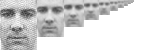

In [4]:
image = np.array(Image.open('face_detection_template.jpg'))

gaussian_pyramid = MakeGaussianPyramid(image, scale=0.75, minsize=1)
display(ShowGaussianPyramid(gaussian_pyramid))

## 5.

threshold =  0.6


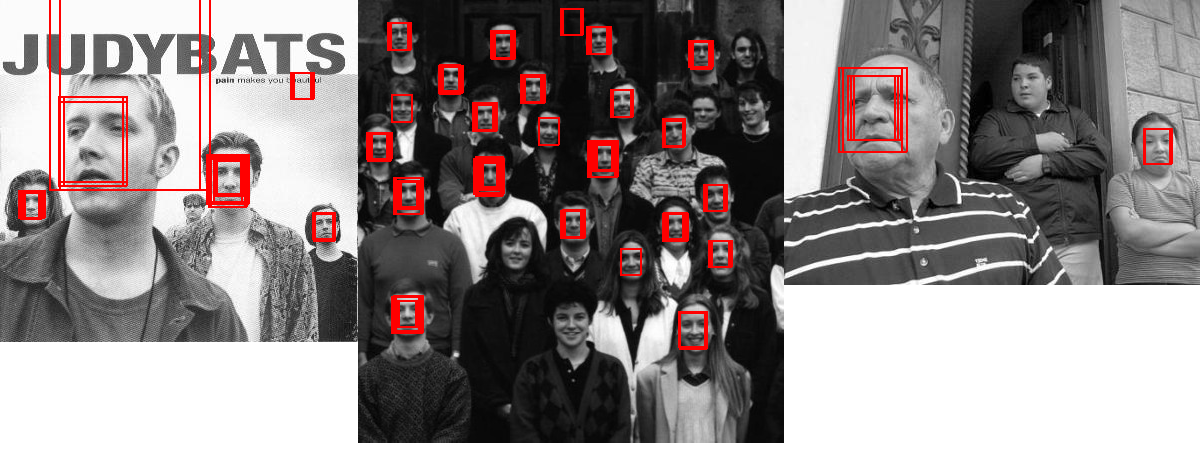

threshold =  0.61


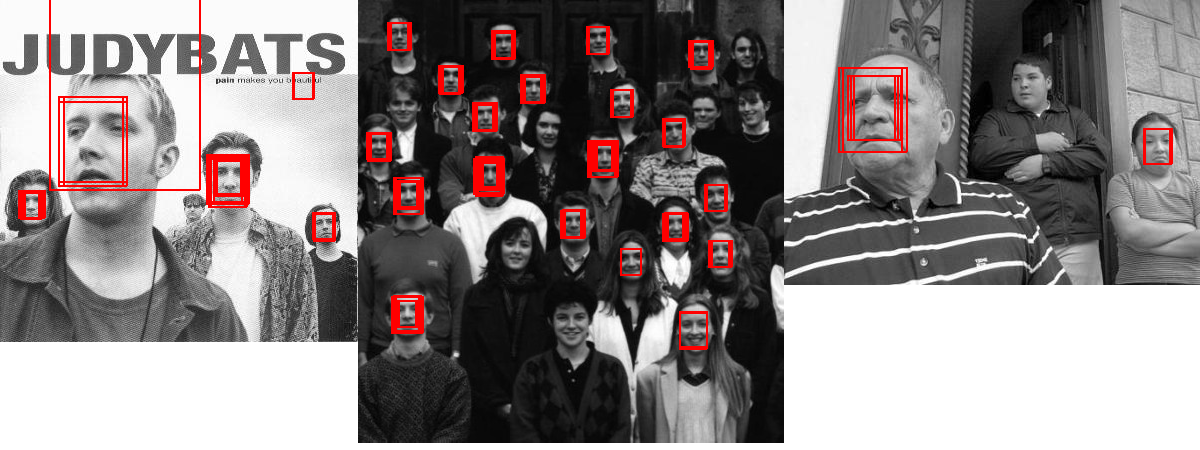

threshold =  0.62


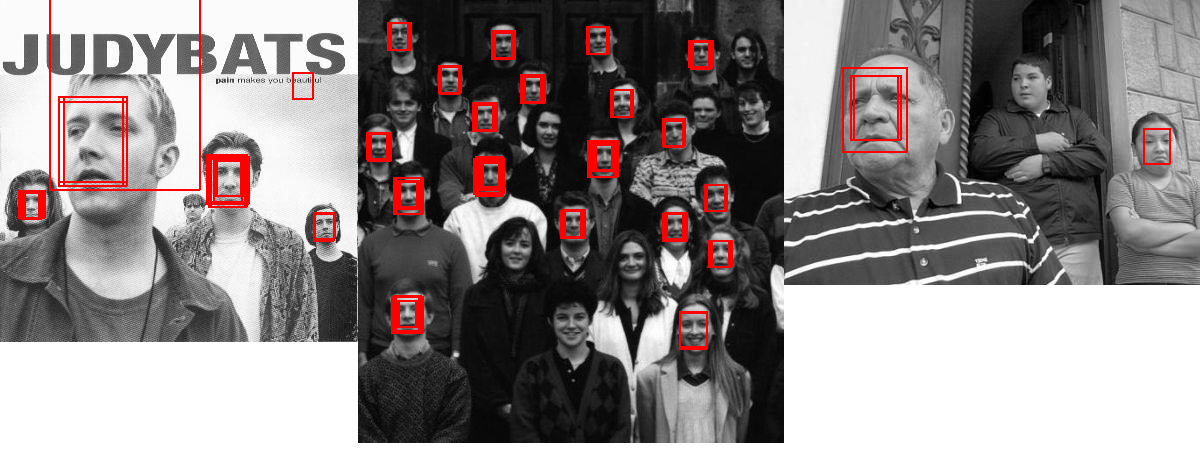

threshold =  0.63


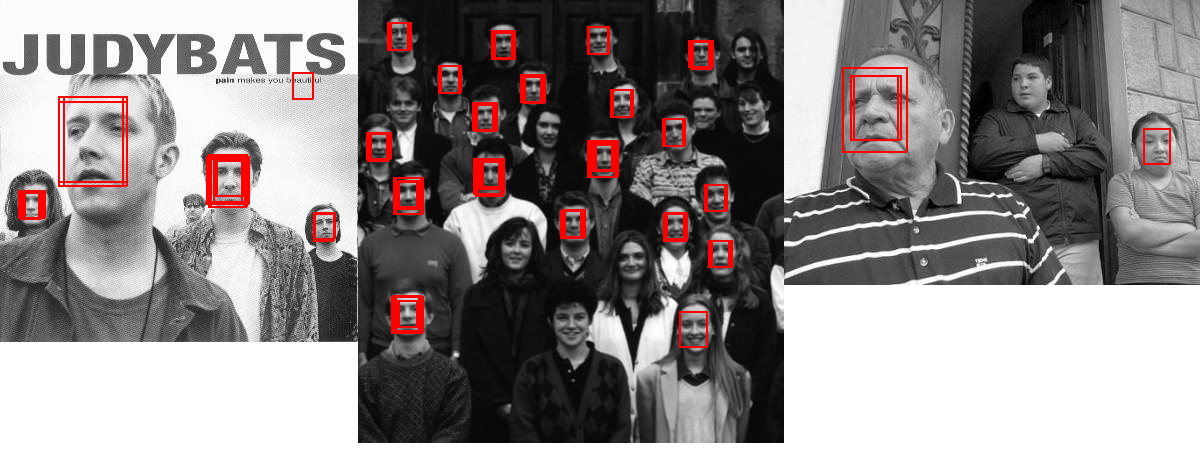

threshold =  0.64


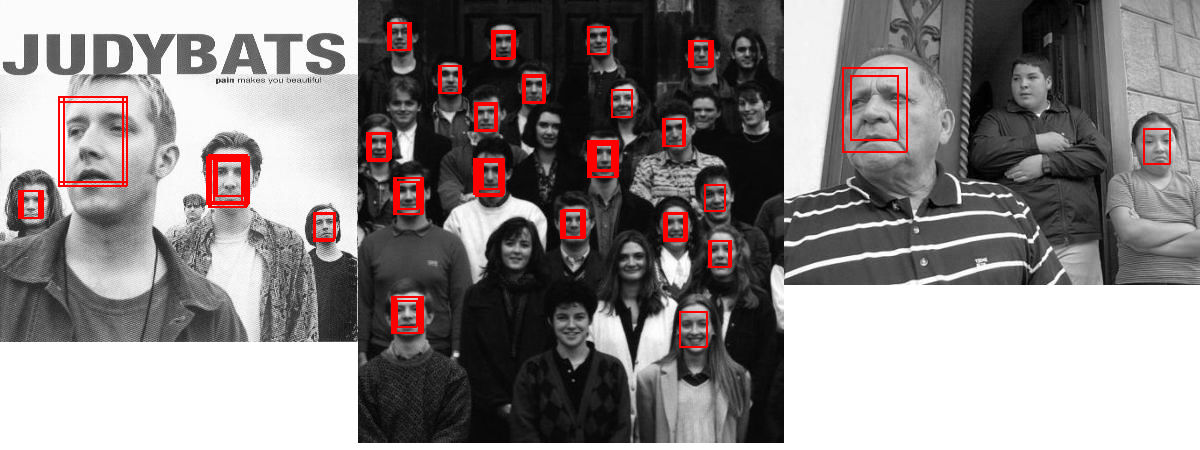

threshold =  0.65


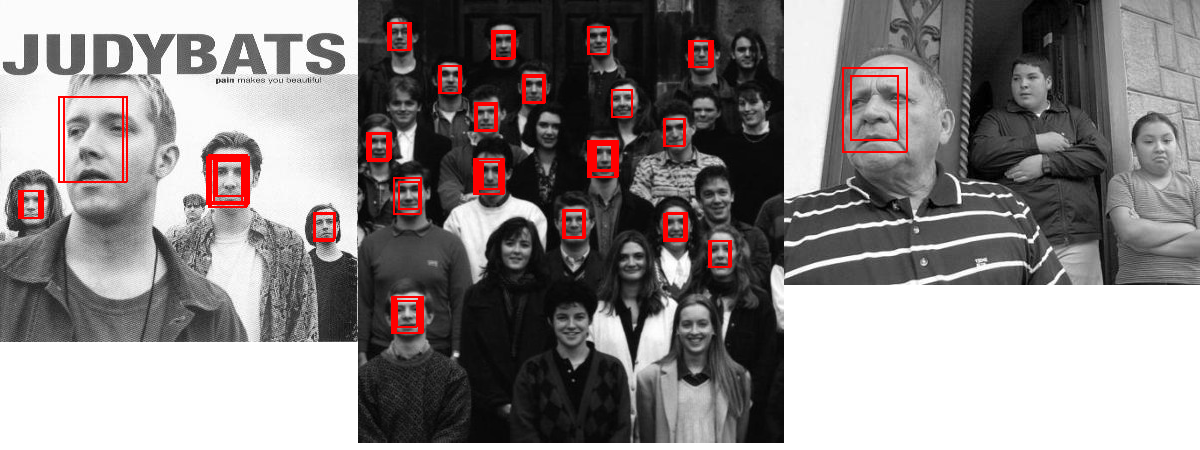

In [7]:
template = Image.open("face_detection_template.jpg")

# iterate through thresholds for all images
for threshold in np.arange(0.60,0.65,0.01):

    strip = Image.new("RGB", (1200, 450), color=(255,255,255))
    offset= 0
    for im_name in ['judybats','students','family']:
        image = np.array(Image.open('faces/'+im_name+'.jpg'))
        gp = MakeGaussianPyramid(image, scale=0.75, minsize=15)
        strip.paste(FindTemplate(gp, template, threshold), (offset, 0))
        offset += image.shape[1]
    print('threshold = ', threshold)
    display(strip)



A threshold of 0.63 gives the best results 

threshold =  0.63


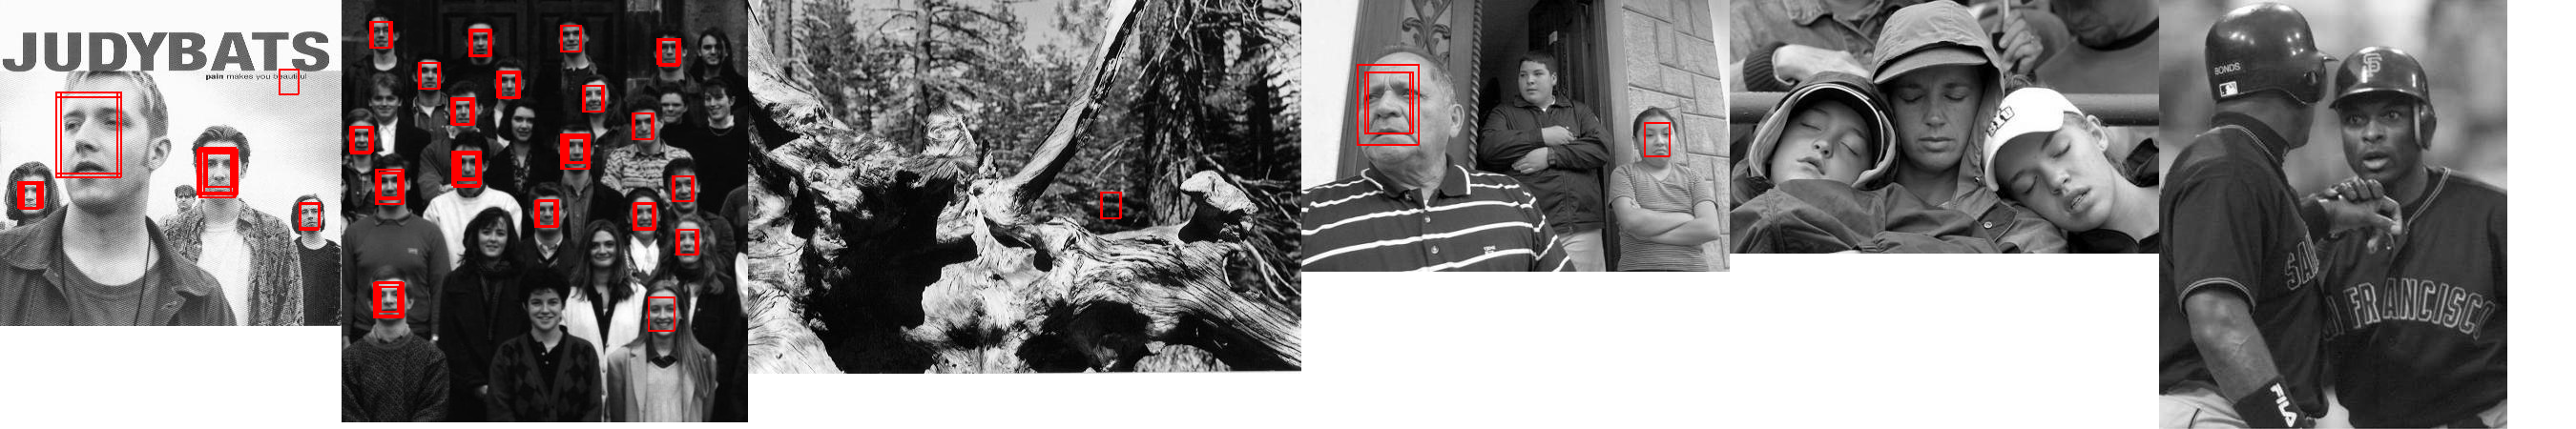

In [4]:
threshold = 0.63
strip = Image.new("RGB", (2700, 450), color=(255,255,255))
offset= 0
for im_name in ['judybats','students','tree','family','fans','sports']:
    image = np.array(Image.open('faces/'+im_name+'.jpg'))
    gp = MakeGaussianPyramid(image, scale=0.75, minsize=15)
    strip.paste(FindTemplate(gp, template, threshold), (offset, 0))
    offset += image.shape[1]
print('threshold = ', threshold)
display(strip)

The recall rate is 

4/5 for judybats

19/27 for students

0/0 for tree

2/3 for family 

0/3 for fans

0/2 for sports

The NCC methods does not work well for the images where the features are rotated or obscured, since it relies on a Gaussian pyramid to detect the features at different scales which works only for shifting and scaling of features. Hence, there are low recall rates on the fans and sports images.

# Part 2

## 3.


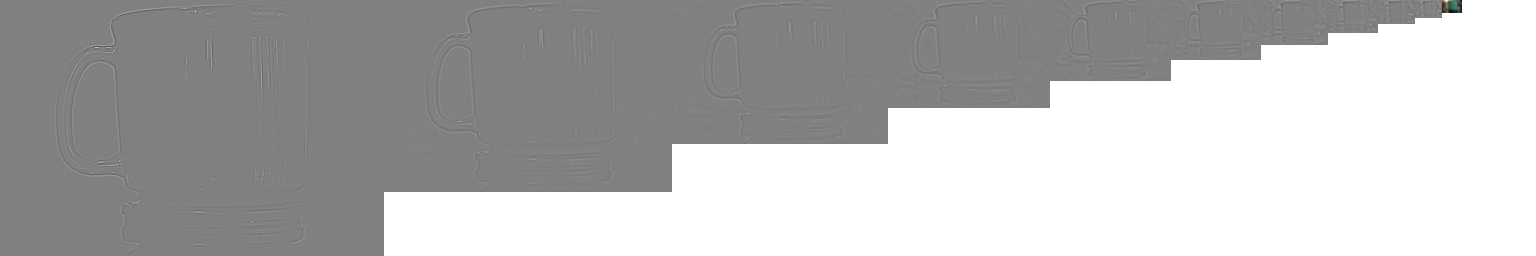

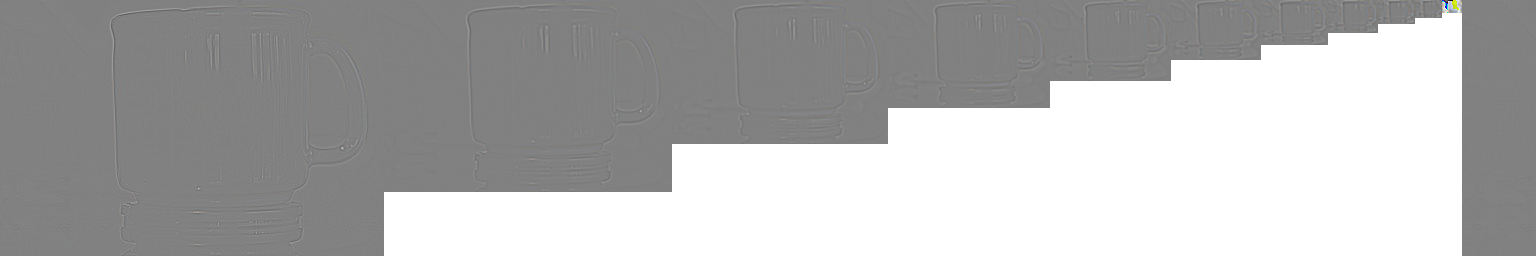

In [23]:
image1 = np.array(Image.open('green_cup.jpg'), dtype=np.float32)

laplacian_pyramid1 = MakeLaplacianPyramid(image1, scale=0.75, minsize=16)
display(ShowLaplacianPyramid(laplacian_pyramid1))

image2 = np.array(Image.open('blue_cup.jpg'))

laplacian_pyramid2 = MakeLaplacianPyramid(image2, scale=0.75, minsize=16)
display(ShowLaplacianPyramid(laplacian_pyramid2))

## 4.


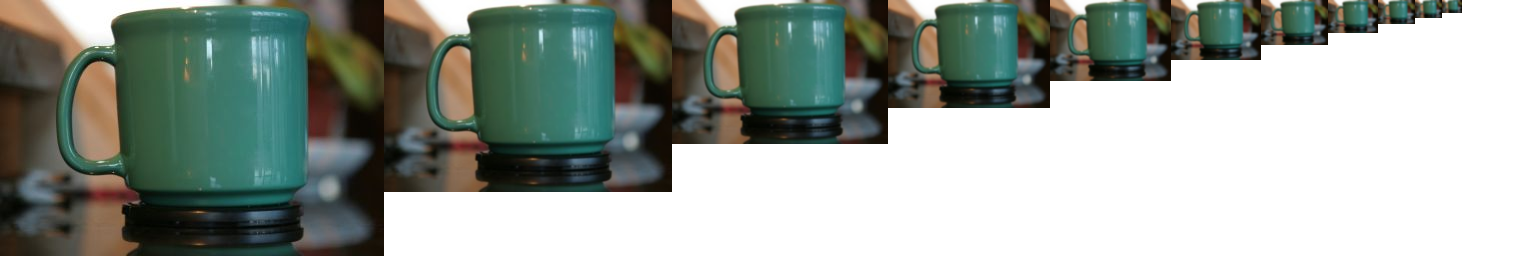

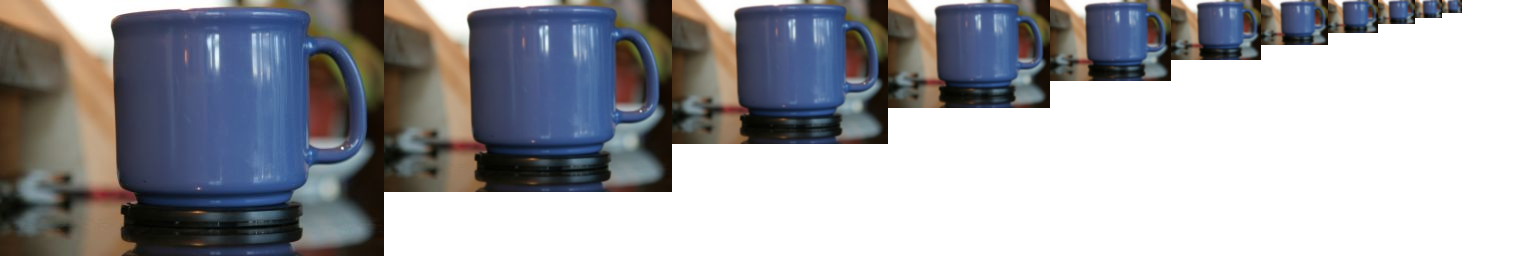

In [21]:
gaussian_pyramid1 = ReconstructGaussianFromLaplacian(laplacian_pyramid1)
gaussian_pyramid2 = ReconstructGaussianFromLaplacian(laplacian_pyramid2)

display(ShowGaussianPyramid(gaussian_pyramid1))
display(ShowGaussianPyramid(gaussian_pyramid2))

## 5.

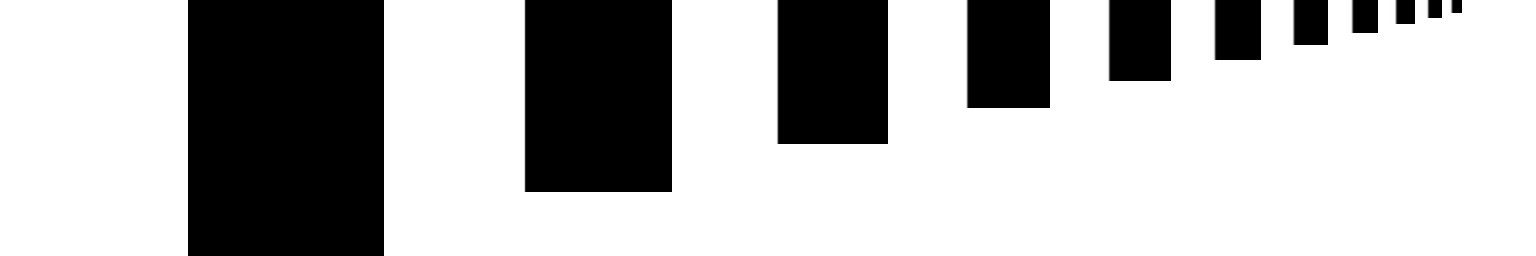

In [22]:
gaussian_mask = Image.open("cup_mask.bmp").convert('RGB')
mask_pyramid = MakeGaussianPyramid(np.array(gaussian_mask, dtype=np.float32), scale=0.75, minsize=16)
display(ShowGaussianPyramid(mask_pyramid))

## 6.

In [10]:
def composeLaplacian(file1, file2, maskfile, scale=0.75, minsize=16):

    mask = Image.open(maskfile).convert('RGB')
    mask_pyramid = MakeGaussianPyramid(np.array(mask), scale, minsize)

    im1 = np.array(Image.open(file1))
    im2 = np.array(Image.open(file2))
    
    lp1 = MakeLaplacianPyramid(im1, scale, minsize)
    lp2 = MakeLaplacianPyramid(im2, scale, minsize)
    

    clp = []
    for i in range(len(lp1)):
    
        first_half = lp1[i]*(mask_pyramid[i]/255)
        second_half = lp2[i]*(1-mask_pyramid[i]/255)
        
        combined = first_half+second_half

        clp.append(combined)

    return clp

def blend(file1, file2, maskfile):
    im1 = Image.open(file1)
    im2 = Image.open(file2)
    
    lp_comp = composeLaplacian(file1, file2, maskfile)
    gp_comp = ReconstructGaussianFromLaplacian(lp_comp)
    
    composed = gp_comp[0]
    
    images = np.hstack([np.uint8(i) for i in (im1,im2,composed)])
    display(Image.fromarray(images))

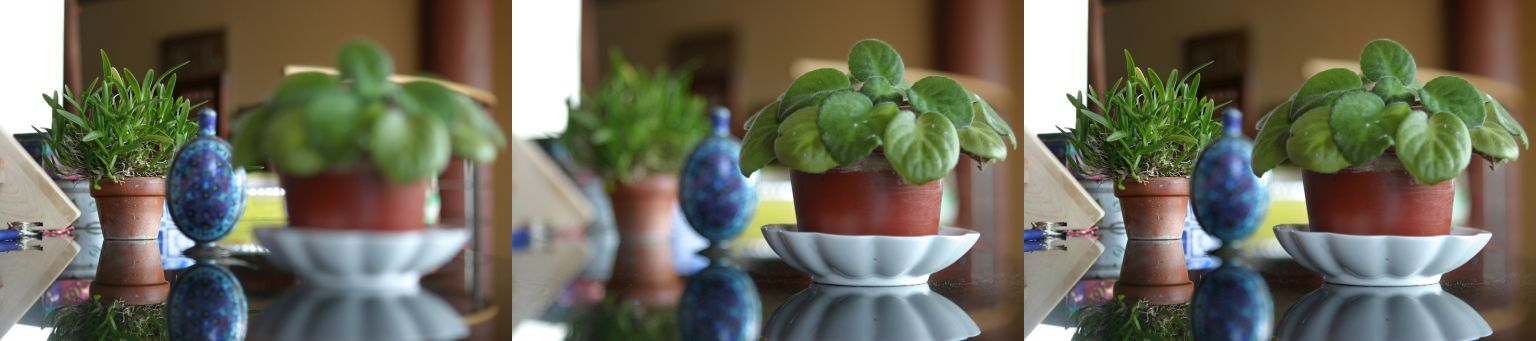

In [11]:
blend('orchid.jpg','violet.jpg','orchid_mask.bmp')

## 7.

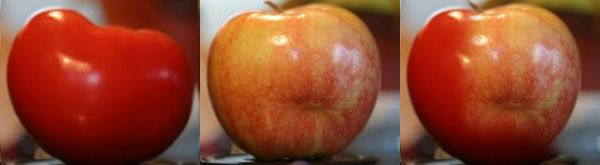

In [12]:
blend('tomato.jpg','apple.jpg','tomato_mask.bmp')

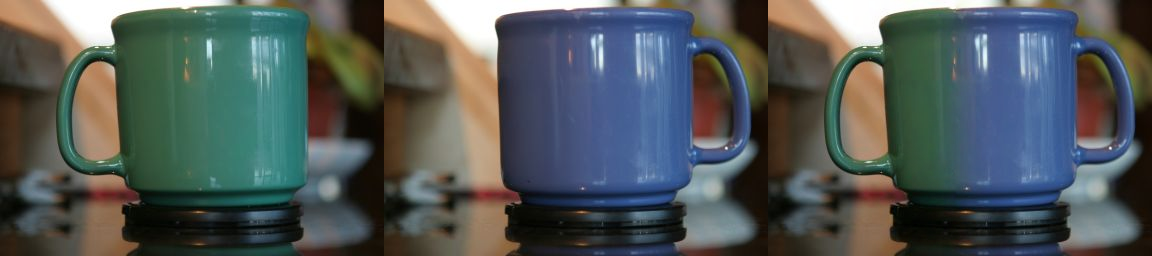

In [13]:
blend("green_cup.jpg","blue_cup.jpg","cup_mask.bmp")